<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accuracy Metrics for SAM2 generated Masks

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 18.6 MB/s eta 0:00:00


In [5]:
from sklearn.metrics import confusion_matrix
import numpy as np
import rasterio

def compute_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
    IoU = intersection / union.astype(np.float32)
    return np.mean(IoU)

def compute_dice(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    dice = (2 * intersection) / (ground_truth_set + predicted_set).astype(np.float32)
    return np.mean(dice)

def compute_pixel_accuracy(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
    correct_pixels = np.diag(current).sum()
    total_pixels = current.sum()
    pixel_accuracy = correct_pixels / total_pixels
    return pixel_accuracy

# Load the images
with rasterio.open('/content/sample_data/segment_12NDVI_another.tif') as ndvi_file:
    ndvi_image = ndvi_file.read(1)  # Read the first band
    ndvi_image = (ndvi_image > 0.6).astype(np.uint8)

with rasterio.open('/content/sample_data/mask_12.tif') as sam_file:
    sam_mask = sam_file.read(1)  # Read the first band
    sam_mask=(sam_mask > 0).astype(np.uint8)

# Threshold NDVI to create binary ground truth (e.g., NDVI > 0.3 for vegetation)
# ndvi_binary = (ndvi_image > 0.3).astype(np.uint8)

# # Ensure the SAM mask is binary
# sam_binary = (sam_mask > 0).astype(np.uint8)

# Compute metrics
iou = compute_iou(sam_mask, ndvi_image)
dice = compute_dice(sam_mask, ndvi_image)
pixel_accuracy = compute_pixel_accuracy(sam_mask, ndvi_image)

# Print results
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")


IoU: 0.6482
Dice Coefficient: 0.7817
Pixel Accuracy: 0.8089


NDVI image shape: (256, 256)
SAM mask shape: (256, 256)
Unique values in NDVI binary: [0 1]
Unique values in SAM binary: [0 1]
IoU: 0.6482
Dice Coefficient: 0.7817
Pixel Accuracy: 0.8089


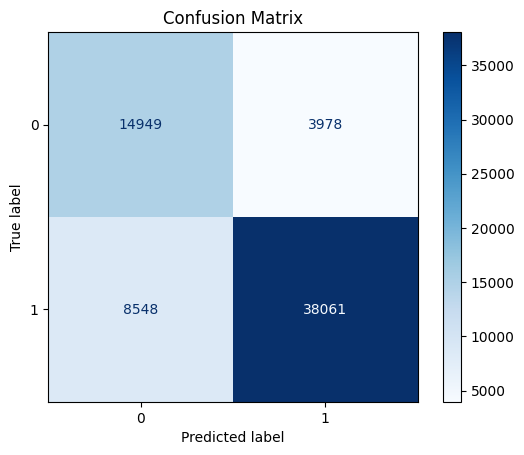

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import rasterio

# Function to compute and visualize confusion matrix
def plot_confusion_matrix(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

# Compute difference between NDVI and SAM masks
def compute_difference(ndvi_image, sam_mask):
    return ndvi_image - sam_mask

# Load the images
with rasterio.open('/content/sample_data/segment_12NDVI_another.tif') as ndvi_file:
    ndvi_image = ndvi_file.read(1)  # Read the first band
    ndvi_image = (ndvi_image > 0.6).astype(np.uint8)

with rasterio.open('/content/sample_data/mask_12.tif') as sam_file:
    sam_mask = sam_file.read(1)  # Read the first band
    sam_mask=(sam_mask > 0).astype(np.uint8)

print("NDVI image shape:", ndvi_image.shape)
print("SAM mask shape:", sam_mask.shape)

print("Unique values in NDVI binary:", np.unique(ndvi_image))
print("Unique values in SAM binary:", np.unique(sam_mask))
# Threshold NDVI to create binary ground truth (e.g., NDVI > 0.3 for vegetation)
# ndvi_binary = (ndvi_image > 0.3).astype(np.uint8)

# # Ensure the SAM mask is binary
# sam_binary = (sam_mask > 0).astype(np.uint8)

# Compute metrics
iou = compute_iou(sam_mask, ndvi_image)
dice = compute_dice(sam_mask, ndvi_image)
pixel_accuracy = compute_pixel_accuracy(sam_mask, ndvi_image)

# Print results
print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")

# Visualize confusion matrix
plot_confusion_matrix(sam_mask, ndvi_image)

# Compute the difference between NDVI and SAM masks
difference = compute_difference(ndvi_image, sam_mask)

# Plot the difference
# plt.figure(figsize=(8, 8))
# plt.imshow(difference, cmap='RdBu', interpolation='none')
# plt.colorbar(label='Difference (NDVI - SAM)')
# plt.title("Difference Between NDVI and SAM Masks")
# plt.show()
